In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

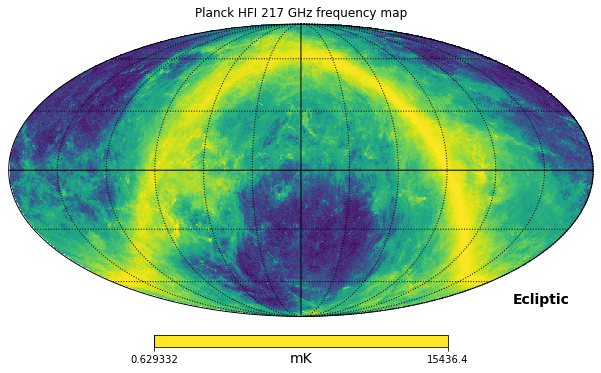

In [5]:
planck_path = '/n17data/jimenez/PLANCK/'
planck = hp.read_map(planck_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
hp.mollview(
    planck,
    coord=["G", "E"],
    title="Planck HFI 217 GHz frequency map",
    unit="mK",
    norm="hist",

)
hp.graticule()

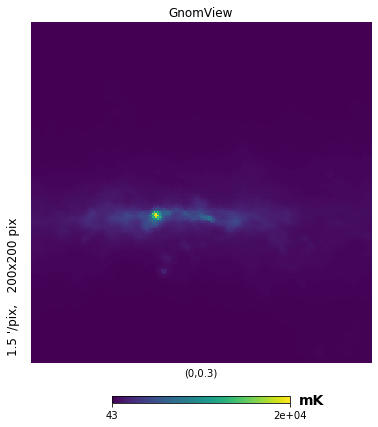

In [6]:
hp.gnomview(planck, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [8]:
LMAX = 1024
cl = hp.anafast(planck, lmax=LMAX)
ell = np.arange(len(cl))

/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/fitsfunc.py:102: FutureWarning: The default dtype of write_cl() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning,


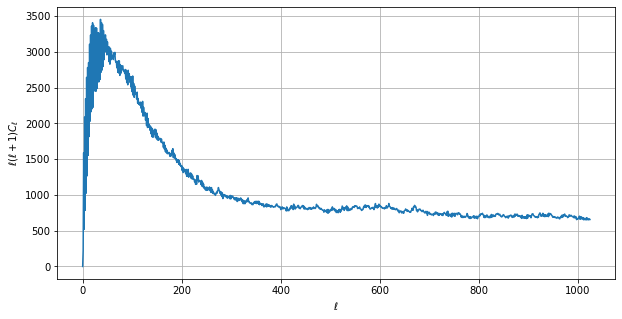

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 2.547965 arcmin (0.000741 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 6.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


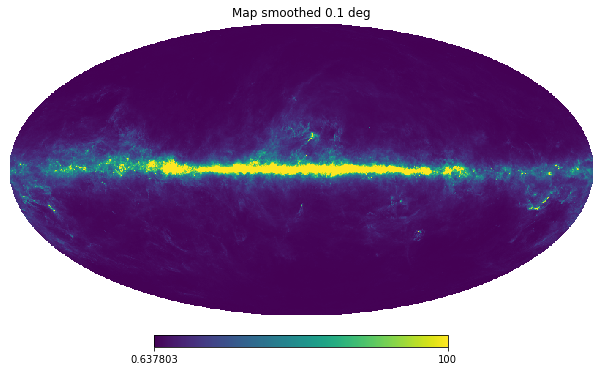

In [11]:
planck_smoothed = hp.smoothing(planck, fwhm=np.radians(0.1))
hp.mollview(planck_smoothed, max=100, title="Map smoothed 0.1 deg")

/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/jimenez/.conda/envs/shapepipe/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
2021-04-01 19:42:43,643 -- DEBUG: projecting 2048_NESTED_galactic
2021-04-01 19:42:43,664 -- DEBUG: cutting maps
2021-04-01 19:42:43,671 -- WARNING: VerifyWarning: Keyword name 'docontour' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created.


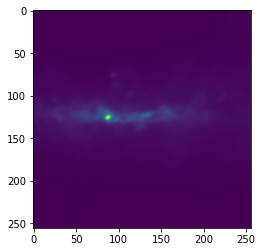

In [34]:
from hpproj import CutSky, to_coord

maps = [(planck_path + "HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits", {'legend': 'HFI 100', 'aperture': [1, 2, 3]}),
        (planck_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits", {'legend': 'HFI 857', 'docontour': True})]

cutsky = CutSky(maps, low_mem=False)

coord = to_coord([0,0])
result = cutsky.cut_fits(coord) # Will only produce the 'fits' key

HDU_100 = result[0]['fits']
HDU_857 = result[1]['fits']

fig = plt.figure()
plt.imshow(HDU_857.data)
plt.show()

{'legend': 'HFI 100', 'fits': <astropy.io.fits.hdu.image.ImageHDU object at 0x7f7248869f50>}


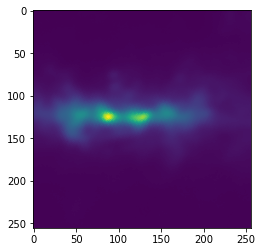

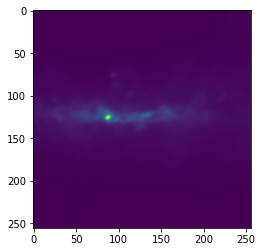

In [24]:
print(result[0])
HDU_100 = result[0]['fits']
HDU_857 = result[1]['fits']
fig = plt.figure()
plt.imshow(HDU_100.data)
plt.show()

fig = plt.figure()
plt.imshow(HDU_857.data)
plt.show()